In [355]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

# EDA

In [356]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [357]:
df = pd.read_csv('/content/drive/MyDrive/bootcamp/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [358]:
use_df = df

## Handling Outliers

### Bagi Data Menjadi Features dan Category

In [359]:
features = ['Age',	'DailyRate',	'DistanceFromHome',	'Education',	'EmployeeCount',	'EmployeeNumber',	'EnvironmentSatisfaction',	'HourlyRate',	'JobInvolvement',	'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 	'RelationshipSatisfaction',	'StandardHours',	'StockOptionLevel',	'TotalWorkingYears',	'TrainingTimesLastYear',	'WorkLifeBalance',	'YearsAtCompany',	'YearsInCurrentRole',	'YearsSinceLastPromotion',	'YearsWithCurrManager']
cats = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

In [360]:
print(len(features))
print(len(cats))
# Total Coloumn 35 Sesuai Dengan Data

26
9


In [361]:
use_df.count()

Age                         1470
Attrition                   1470
BusinessTravel              1470
DailyRate                   1470
Department                  1470
DistanceFromHome            1470
Education                   1470
EducationField              1470
EmployeeCount               1470
EmployeeNumber              1470
EnvironmentSatisfaction     1470
Gender                      1470
HourlyRate                  1470
JobInvolvement              1470
JobLevel                    1470
JobRole                     1470
JobSatisfaction             1470
MaritalStatus               1470
MonthlyIncome               1470
MonthlyRate                 1470
NumCompaniesWorked          1470
Over18                      1470
OverTime                    1470
PercentSalaryHike           1470
PerformanceRating           1470
RelationshipSatisfaction    1470
StandardHours               1470
StockOptionLevel            1470
TotalWorkingYears           1470
TrainingTimesLastYear       1470
WorkLifeBa

### Cek Persebaran dan Tentukan Data yang Terdapat Outliers

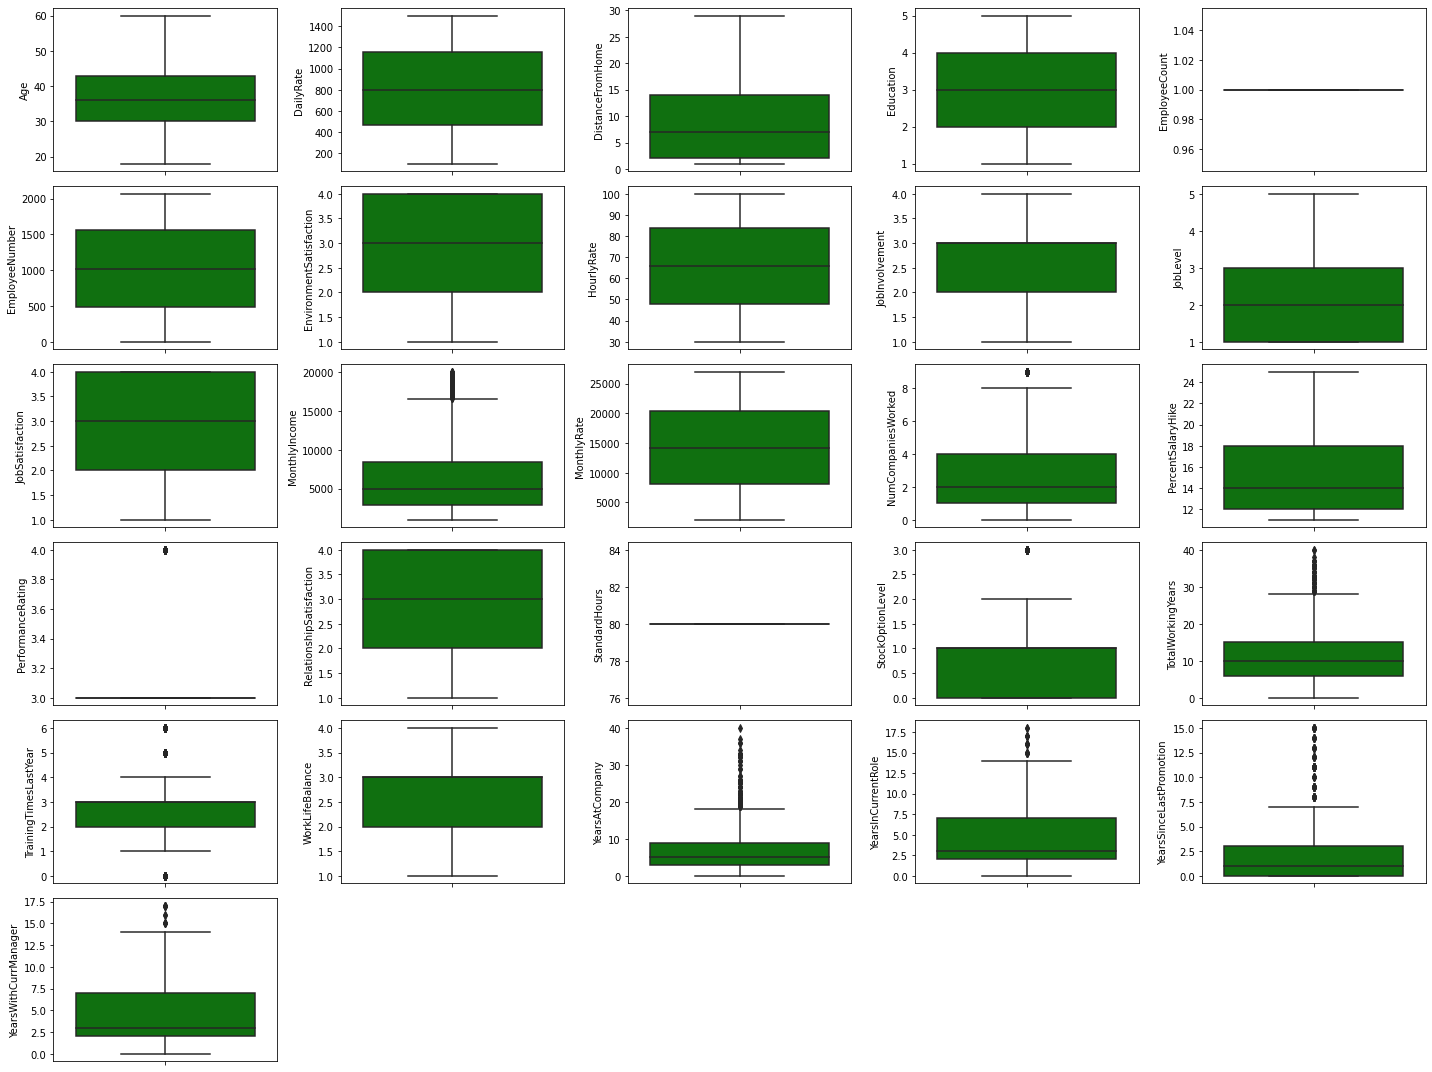

In [362]:
plt.figure(figsize = (20,15))
for i in range(0, len(features)): 
  plt.subplot(6, 5, i+1)
  sns.boxplot(y = use_df[features[i]], color = 'green')
  plt.tight_layout()

Data yang Terdapat Outliers:

MonthlyIncome, 
NumCompaniesWorked, 
StockOptionLevel, 
TotalWorkingYears, 
TrainingTimesLastYear, 
YearsAtCompany, 
YearsInCurrentRole, 
YearsSinceLastPromotion,
YearsWithCurrManager

### Tentukan Batas Atas Dan Batas Bawah

In [363]:
# Input Jadi Satu List
outliers_coloumns = ['MonthlyIncome', 
                      'NumCompaniesWorked', 
                      'StockOptionLevel', 
                      'TotalWorkingYears', 
                      'TrainingTimesLastYear', 
                      'YearsAtCompany', 
                      'YearsInCurrentRole', 
                      'YearsSinceLastPromotion', 
                      'YearsWithCurrManager']

# Q1 Untuk Batas Bawah
Q1 = (use_df[outliers_coloumns]).quantile(0.25)

# Q3 Untuk Batas Atas
Q3 = (use_df[outliers_coloumns]).quantile(0.75)

# IQR (Interquartile Range)
IQR = Q3 - Q1

In [364]:
# Statistik Sebelum Dilakukan Handling
use_df[outliers_coloumns].describe()

,MonthlyIncome,NumCompaniesWorked,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,6502.931293,2.693197,0.793878,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,4707.956783,2.498009,0.852077,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,1009.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2911.000000,1.000000,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,4919.000000,2.000000,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,8379.000000,4.000000,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,19999.000000,9.000000,3.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


In [365]:
# Cari Maksimum Q3 
maximum = Q3 + (1.5*IQR)
print('Batas Maximum: ')
print(maximum)

Batas Maximum: 
MonthlyIncome              16581.0
NumCompaniesWorked             8.5
StockOptionLevel               2.5
TotalWorkingYears             28.5
TrainingTimesLastYear          4.5
YearsAtCompany                18.0
YearsInCurrentRole            14.5
YearsSinceLastPromotion        7.5
YearsWithCurrManager          14.5
dtype: float64


In [366]:
# Cari Minimum Q1 
minimum = Q1 - (1.5*IQR)
print('Bata Minimum: ')
print(minimum)

Bata Minimum: 
MonthlyIncome             -5291.0
NumCompaniesWorked           -3.5
StockOptionLevel             -1.5
TotalWorkingYears            -7.5
TrainingTimesLastYear         0.5
YearsAtCompany               -6.0
YearsInCurrentRole           -5.5
YearsSinceLastPromotion      -4.5
YearsWithCurrManager         -5.5
dtype: float64


### Filter Data yang Outliers

In [367]:
for i in range(0, len(outliers_coloumns)):
  use_df = use_df[(use_df[outliers_coloumns[i]] < maximum[i]) & (use_df[outliers_coloumns[i]] > minimum[i])]

In [368]:
# Statistik Setelah Dilakukan Outliers
use_df[outliers_coloumns].describe()

,MonthlyIncome,NumCompaniesWorked,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000
mean,5071.843818,2.458785,0.671367,8.975054,2.524946,5.388286,3.563991,1.416486,3.519523
std,2918.175554,2.214583,0.689162,5.229627,0.745545,3.616375,3.017273,1.971587,3.007798
min,1051.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2773.250000,1.000000,0.000000,5.000000,2.000000,2.000000,2.000000,0.000000,2.000000
50%,4402.000000,1.000000,1.000000,9.000000,2.000000,5.000000,2.000000,1.000000,2.000000
75%,6318.000000,4.000000,1.000000,11.000000,3.000000,8.000000,7.000000,2.000000,7.000000
max,16422.000000,8.000000,2.000000,28.000000,4.000000,17.000000,14.000000,7.000000,13.000000


### Cek Persebaran Setelah Di Hapus Outliers

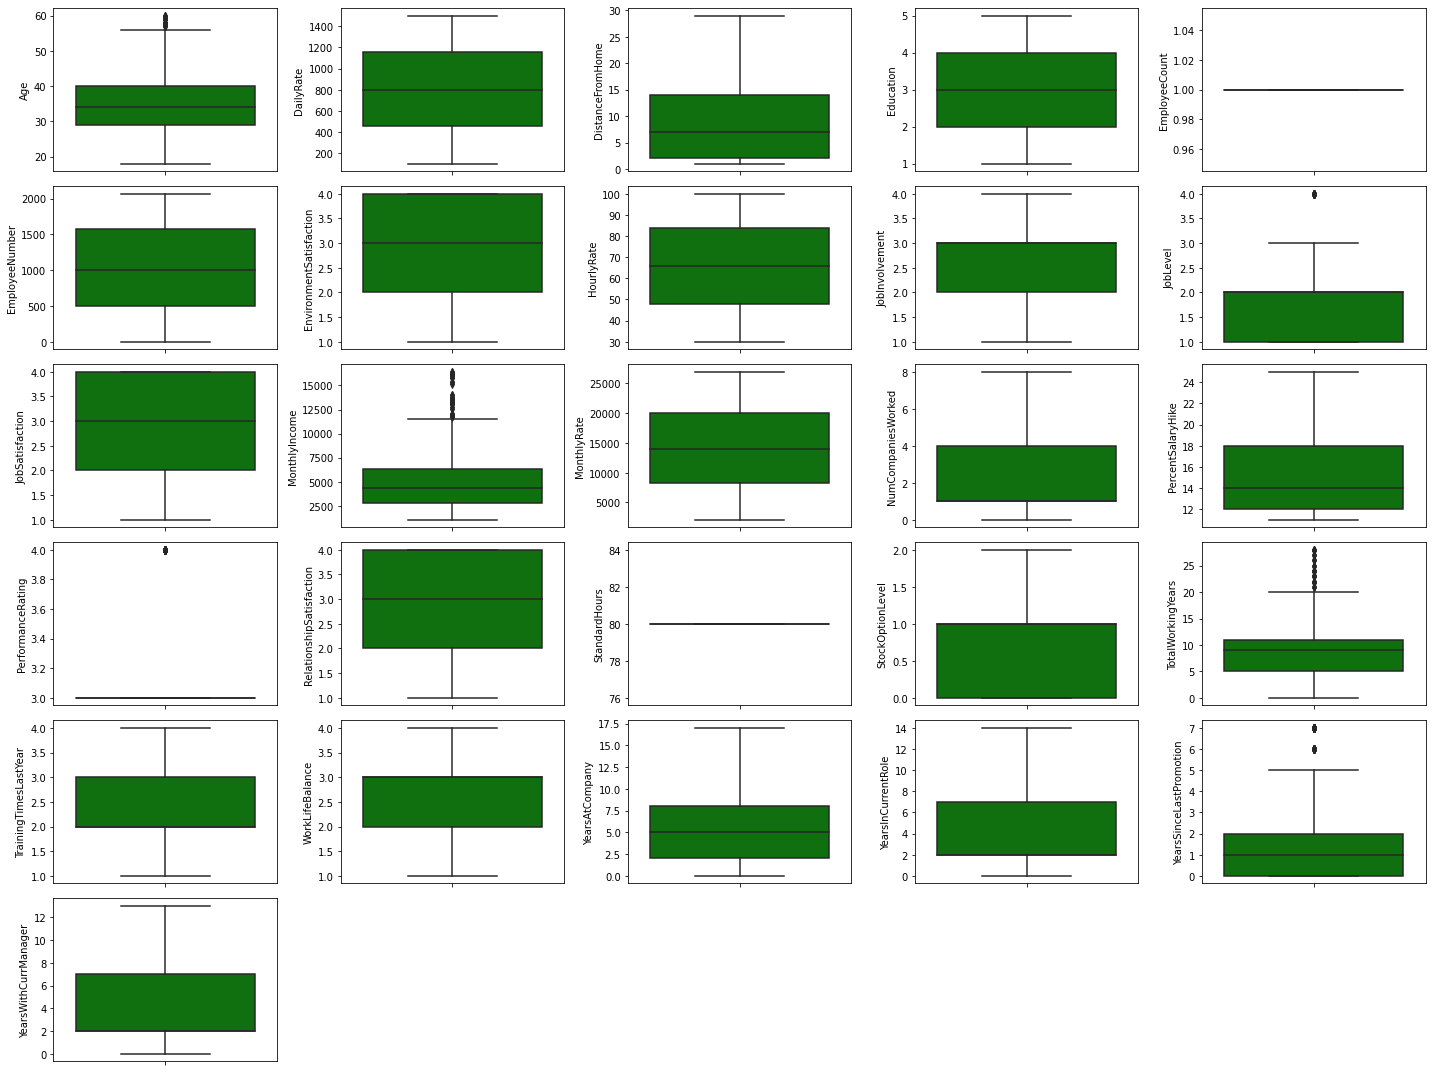

In [369]:
plt.figure(figsize = (20,15))
for i in range(0, len(features)): 
  plt.subplot(6, 5, i+1)
  sns.boxplot(y = use_df[features[i]], color = 'green')
  plt.tight_layout()

## Normalisasi Data

In [370]:
use_df.sample(3).T

,1233,527,433
Age,30,32,46
Attrition,No,No,No
BusinessTravel,Travel_Rarely,Travel_Rarely,Travel_Rarely
DailyRate,793,929,1125
Department,Research & Development,Sales,Sales
DistanceFromHome,16,10,10
Education,1,3,3
EducationField,Life Sciences,Marketing,Marketing
EmployeeCount,1,1,1
EmployeeNumber,1729,722,580


In [371]:
from sklearn.preprocessing import MinMaxScaler

normalization_coloumns = ['Age', 'DailyRate', 'Education', 'JobLevel']
normalization_coloumns.append('MonthlyIncome')
normalization_coloumns.append('MonthlyRate')
normalization_coloumns.append('HourlyRate')
normalization_coloumns

for i in range(0, len(normalization_coloumns)):
  use_df[normalization_coloumns[i]] = MinMaxScaler().fit_transform(use_df[normalization_coloumns[i]].values.reshape(len(use_df), 1))

In [372]:
use_df[normalization_coloumns]

,Age,DailyRate,Education,JobLevel,MonthlyIncome,MonthlyRate,HourlyRate
1,0.738095,0.126165,0.00,0.333333,0.265370,0.917132,0.442857
2,0.452381,0.910394,0.25,0.000000,0.067595,0.012022,0.885714
3,0.357143,0.924014,0.75,0.000000,0.120877,0.846850,0.371429
5,0.333333,0.646595,0.25,0.000000,0.131221,0.392706,0.700000
7,0.285714,0.899642,0.00,0.000000,0.106825,0.451852,0.528571
...,...,...,...,...,...,...,...
1463,0.309524,0.159140,0.50,0.333333,0.578037,0.067951,0.628571
1464,0.190476,0.762724,0.50,0.000000,0.124585,0.775240,0.000000
1465,0.428571,0.559857,0.25,0.333333,0.098888,0.409835,0.157143
1468,0.738095,0.659498,0.50,0.333333,0.282285,0.448152,0.471429


## Transformasi Log

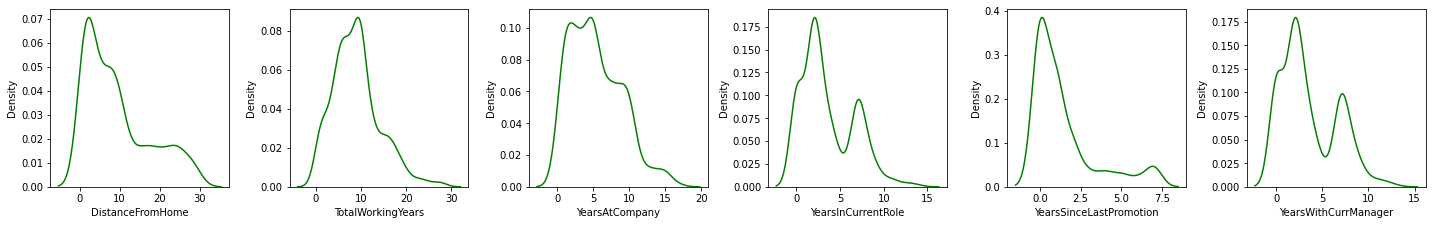

In [373]:
log_tr_coloumns = ['DistanceFromHome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Sebelum Log Tranformation
plt.figure(figsize=(20, 15))
for i in range(0, len(log_tr_coloumns)):
    plt.subplot(5, 6,  i+1)
    sns.kdeplot(x=use_df[log_tr_coloumns[i]], color='green')
    plt.xlabel(log_tr_coloumns[i])
    plt.tight_layout()

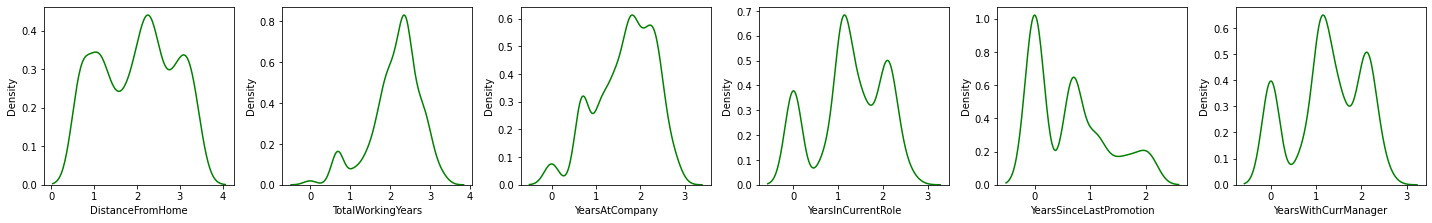

In [374]:
# Log Transformation

plt.figure(figsize=(20, 15))
for i in range(0, len(log_tr_coloumns)) :
  use_df[log_tr_coloumns[i]] = np.log(use_df[log_tr_coloumns[i]] + 1)
  plt.subplot(5, 6,  i+1)
  sns.kdeplot(x=use_df[log_tr_coloumns[i]], color='green')
  plt.xlabel(log_tr_coloumns[i])
  plt.tight_layout()

In [375]:
use_df[log_tr_coloumns].describe().T

,count,mean,std,min,25%,50%,75%,max
DistanceFromHome,922.0,1.997468,0.860765,0.693147,1.098612,2.079442,2.708050,3.401197
TotalWorkingYears,922.0,2.138401,0.619797,0.000000,1.791759,2.302585,2.484907,3.367296
YearsAtCompany,922.0,1.668160,0.652046,0.000000,1.098612,1.791759,2.197225,2.890372
YearsInCurrentRole,922.0,1.268051,0.752351,0.000000,1.098612,1.098612,2.079442,2.708050
YearsSinceLastPromotion,922.0,0.629349,0.671878,0.000000,0.000000,0.693147,1.098612,2.079442
YearsWithCurrManager,922.0,1.250584,0.764511,0.000000,1.098612,1.098612,2.079442,2.639057


## Feature Encoding

In [376]:
# Label
Gender = {
    'Female' : 0,
    'Male' : 1
}
Attrition = {
    'No' : 0,
    'Yes' : 1
}
Overtime = {
    'No' : 0,
    'Yes' : 1
}
travel = {
    'Travel_Frequently':2,
    'Travel_Rarely':1,
    'Non-Travel':0
  }

use_df['BusinessTravel'] = use_df['BusinessTravel'].map(travel)
use_df['Gender'] = use_df['Gender'].map(Gender)
use_df['Attrition'] = use_df['Attrition'].map(Attrition)
use_df['OverTime'] = use_df['OverTime'].map(Overtime)

In [377]:
# OHE 
for cat in ['JobRole', 'Department', 'EducationField', 'MaritalStatus']:
    onehots = pd.get_dummies(use_df[cat], prefix=cat)
    use_df = use_df.join(onehots)
    use_df = use_df.drop(columns = [cat])

In [378]:
use_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,922.0,0.414162,0.205424,0.000000,0.261905,0.380952,0.523810,1.000000
Attrition,922.0,0.176790,0.381698,0.000000,0.000000,0.000000,0.000000,1.000000
BusinessTravel,922.0,1.099783,0.526001,0.000000,1.000000,1.000000,1.000000,2.000000
DailyRate,922.0,0.499541,0.288263,0.000000,0.257168,0.501075,0.755556,1.000000
DistanceFromHome,922.0,1.997468,0.860765,0.693147,1.098612,2.079442,2.708050,3.401197
Education,922.0,0.472885,0.255923,0.000000,0.250000,0.500000,0.750000,1.000000
EmployeeCount,922.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
EmployeeNumber,922.0,1030.022777,606.409080,2.000000,497.250000,1008.500000,1568.750000,2068.000000
EnvironmentSatisfaction,922.0,2.725597,1.084676,1.000000,2.000000,3.000000,4.000000,4.000000
Gender,922.0,0.618221,0.486086,0.000000,0.000000,1.000000,1.000000,1.000000


# Preprocessing

## Feature Engineering

Menambahkan Fitur Baru

Keterangan Job Role dan Education yang Sesuai 

- Sales Executive,  Sales Representative: Marketing
- Research Scientist, Research Director: Life Sciences
- Healthcare Representative: Medical
- Laboratory Technician, Manufacturing Director: Technical Degree
- HR: HR
- Manager : 
  1. Department HR : HR
  2. Research & Development : Life Sciences, Medical, Technical Degree
  3. Sales : Marketing

- Jika Education Field Others : Maka Akan Ditulis Others

In [379]:
# Buat Function Untuk Cek Lintas Edu Field / Sesuai Edu Field
result = ''

def cek_edufield (JobRole, EducationField, Department) :
 if (JobRole == 'Sales Executive') | (JobRole == 'Sales Representative'):
   if EducationField == 'Marketing' :
    result = 'Sesuai'
    return result
   elif EducationField == 'Other': 
    result = 'Other'
    return result
   else :
    result = 'Tidak Sesuai' 
    return result

 elif (JobRole == 'Research Scientist') | (JobRole == 'Research Director'):
   if EducationField == 'Life Sciences' : 
    result = 'Sesuai'
    return result
   elif EducationField == 'Other': 
    result = 'Other'
    return result
   else : 
    result = 'Tidak Sesuai' 
    return result

 elif JobRole == 'Healthcare Representative' :
   if EducationField == 'Medical': 
    result = 'Sesuai'
    return result
   elif EducationField == 'Other': 
    result = 'Other'
    return result
   else : 
    result = 'Tidak Sesuai'
    return result

 elif JobRole == 'Human Resources' :
   if EducationField == 'Human Resources' : 
    result = 'Sesuai'
    return result
   elif EducationField == 'Other' : 
    result = 'Sesuai'
    return result
   else :
    result = 'Tidak Sesuai'
    return result
 
 elif (JobRole == 'Laboratory Technician') | (JobRole == 'Manufacturing Director'):
   if EducationField == 'Technical Degree':
     result = 'Sesuai'
     return result
   elif EducationField == 'Other':
     result = 'Other'
     return result
   else :
     result = 'Tidak Sesuai'
     return result

 elif JobRole == 'Manager':
  if Department == 'Human Resources': 
    if EducationField == 'Human Resources':
      result = 'Sesuai'
      return result
    elif EducationField == 'Other': 
      result = 'Other'
      return result
    else :
      result = 'Tidak Sesuai'
      return result
  elif Department == 'Research & Development' :
    if (EducationField == 'Life Sciences') | (EducationField == 'Medical') | (EducationField == 'Technical Degree') : 
      result = 'Sesuai'
      return result
    elif EducationField == 'Other':
      result = 'Other' 
      return result
    else : 
      result = 'Tidak Sesuai'
      return result
  elif Department == 'Sales' :
    if EducationField == 'Marketing':
      result = 'Sesuai'
      return result
    elif EducationField == 'Other':
      result = 'Other'
      return result
    else :
      result = 'Tidak Sesuai'
      return result
  else : 
    result = 'Department Tidak Ditemukan'
    return result

 else :
   result = 'Job Role Tidak Tercantum Dalam List'
   return result

cek_edufield('Sales Representative','Marketing','Sales')

'Sesuai'

In [380]:
# Apply Function Kedalam Data
use_df['Kesesuaian Karir'] = df.apply(lambda x: cek_edufield(x['JobRole'], x['EducationField'], x['Department']), axis = 1)

In [381]:
# Dijadikan Integer Agar Dapat Dimasukan ke Model Dengan Menggunakan Label
# 0: Tidak Sesuai, 1: Sesuai 2: Others
Kesesuaian_Karir = {
    'Tidak Sesuai' : 0,
    'Sesuai' : 1,
    'Other' : 2
}

use_df['Kesesuaian Karir'] = use_df['Kesesuaian Karir'].map(Kesesuaian_Karir)
use_df.sample(5).T

,504,202,458,1336,7
Age,0.642857,0.380952,0.52381,0.880952,0.285714
Attrition,1,0,0,0,0
BusinessTravel,2,2,0,1,1
DailyRate,0.14552,0.555556,0.710394,0.525448,0.899642
DistanceFromHome,3.295837,2.397895,3.367296,1.098612,3.218876
Education,0.75,0.75,0.5,0.75,0.0
EmployeeCount,1,1,1,1,1
EmployeeNumber,684,277,615,1873,11
EnvironmentSatisfaction,1,4,3,2,4
Gender,0,1,1,1,1


Aggregasi Satisfaction

In [382]:
result = 0
def satisfaction (EnvironmentSatisfaction, JobSatisfaction, RelationshipSatisfaction): 
  result = (EnvironmentSatisfaction + JobSatisfaction + RelationshipSatisfaction) / 3
  return result

In [383]:
use_df['Satisfaction Average'] = use_df.apply(lambda x : satisfaction(x['EnvironmentSatisfaction'], x['JobSatisfaction'], x['RelationshipSatisfaction']), axis = 1)
use_df.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Kesesuaian Karir,Satisfaction Average
1,0.738095,0,2,0.126165,2.197225,0.00,1,2,3,1,...,1,0,0,0,0,0,1,0,1,3.000000
2,0.452381,1,1,0.910394,1.098612,0.25,1,4,4,1,...,0,0,0,1,0,0,0,1,2,3.000000
3,0.357143,0,2,0.924014,1.386294,0.75,1,5,4,0,...,1,0,0,0,0,0,1,0,1,3.333333
5,0.333333,0,2,0.646595,1.098612,0.25,1,8,4,1,...,1,0,0,0,0,0,0,1,0,3.666667
7,0.285714,0,1,0.899642,3.218876,0.00,1,11,4,1,...,1,0,0,0,0,1,0,0,0,3.000000


## Feature Selection

In [384]:
# Drop Coloumn Dengan Unique Hanya 1
use_df= use_df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'])

In [385]:
use_df.sample(3).T

,444,192,143
Age,0.714286,0.404762,0.285714
Attrition,0.000000,1.000000,0.000000
BusinessTravel,1.000000,1.000000,1.000000
DailyRate,0.043011,0.324731,0.240143
DistanceFromHome,1.098612,3.178054,2.944439
Education,1.000000,0.250000,0.500000
EmployeeNumber,595.000000,261.000000,194.000000
EnvironmentSatisfaction,2.000000,2.000000,1.000000
Gender,0.000000,1.000000,0.000000
HourlyRate,0.100000,0.285714,0.642857


# Machine Learning

## Split Data

In [386]:
import warnings
warnings.filterwarnings('ignore')

X = use_df.drop(columns = ['Attrition'])
y = use_df[['Attrition']]

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, get_scorer

In [387]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Model (Classification)

In [405]:
# Import Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [406]:
def eval_classification(model): 
  # Prediction
  y_pred = model.predict(X_test)
  y_pred_train = model.predict(X_train)
  y_pred_proba = model.predict_proba(X_test)
  y_pred_proba_train = model.predict_proba(X_train)
  
  # Test Score
  print('Scoring')
  print('Accuracy (Test): %.2f' % accuracy_score(y_test, y_pred))
  print('Accuracy (Train): %.2f' % accuracy_score(y_train, y_pred_train))
  print('Precision (Test): %.2f' % precision_score(y_test, y_pred))
  print('Precision (Train): %.2f' % precision_score(y_train, y_pred_train))
  print('Recall (Test): %.2f' % recall_score(y_test, y_pred))
  print('Recall (Train): %.2f' % recall_score(y_train, y_pred_train))
  print('F1 (Test): %.2f' % f1_score(y_test, y_pred))
  print('F1 (Train): %.2f' % f1_score(y_train, y_pred_train))
  print('AUC (Test Proba): %.2f' % roc_auc_score(y_test, y_pred_proba[:,1]))
  print('AUC (Train Proba): %.2f' % roc_auc_score(y_train, y_pred_proba_train[:,1]))
  print('Test Score: %.2f' % model.score(X_test, y_test))
  print('Train Score: %.2f' % model.score(X_train, y_train))

### No Balancing

#### Logistic Regression

In [407]:
# Model
lr = LogisticRegression()
lr.fit(X_train,y_train)

# Evaluation
eval_classification(lr)

Scoring
Accuracy (Test): 0.86
Accuracy (Train): 0.89
Precision (Test): 0.53
Precision (Train): 0.81
Recall (Test): 0.33
Recall (Train): 0.50
F1 (Test): 0.41
F1 (Train): 0.62
AUC (Test Proba): 0.84
AUC (Train Proba): 0.87
Test Score: 0.86
Train Score: 0.89


In [408]:
# Hyperparameter Tuning
penalty = ['l1','l2','none']
C = [int(x) for x in np.linspace(0.0001, 1)]
solver = ['newton-cg', 'saga', 'sag']

hyperparam = dict(penalty = penalty, 
                  C=C, 
                  solver = solver)

lr = LogisticRegression()
rs = RandomizedSearchCV(lr, hyperparam, cv = 5, scoring = 'roc_auc')
rs.fit(X_train, y_train)

eval_classification(gs)

Scoring
Accuracy (Test): 0.77
Accuracy (Train): 0.82
Precision (Test): 0.20
Precision (Train): 0.51
Recall (Test): 0.19
Recall (Train): 0.44
F1 (Test): 0.19
F1 (Train): 0.47
AUC (Test Proba): 0.60
AUC (Train Proba): 0.79
Test Score: 0.60
Train Score: 0.79


In [409]:
rs.best_estimator_.get_params()

{'C': 0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'none',
 'random_state': None,
 'solver': 'sag',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

#### Decision Tree

In [410]:
# Model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
# Evaluation
eval_classification(dt)

Scoring
Accuracy (Test): 0.78
Accuracy (Train): 1.00
Precision (Test): 0.25
Precision (Train): 1.00
Recall (Test): 0.26
Recall (Train): 1.00
F1 (Test): 0.25
F1 (Train): 1.00
AUC (Test Proba): 0.56
AUC (Train Proba): 1.00
Test Score: 0.78
Train Score: 1.00


In [411]:
# Tuning Hyperparameter
min_samples_split = [int(x) for x in np.linspace(1, 10)]
min_samples_leaf = [int(x) for x in np.linspace(1, 10)]
max_features = ['auto', 'sqrt', 'log2', 'none']
criterion = ['gini', 'entropy']

hyperparams = dict(min_samples_split = min_samples_split,
                   min_samples_leaf = min_samples_leaf,
                   max_features = max_features,
                   criterion = criterion)

dt = DecisionTreeClassifier()
rs = RandomizedSearchCV(dt, 
                  hyperparams, 
                  cv = 5, 
                  scoring = 'roc_auc')
rs.fit(X_train, y_train)

# Evaluation
eval_classification(gs)

Scoring
Accuracy (Test): 0.77
Accuracy (Train): 0.82
Precision (Test): 0.20
Precision (Train): 0.51
Recall (Test): 0.19
Recall (Train): 0.44
F1 (Test): 0.19
F1 (Train): 0.47
AUC (Test Proba): 0.60
AUC (Train Proba): 0.79
Test Score: 0.60
Train Score: 0.79


In [412]:
rs.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

### Balancing (SMOTE)

In [413]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
X_train_smote, y_train_smote = over_sampling.SMOTE(1).fit_resample(X_train, y_train)

In [414]:
Not_Attrition = []
Attrition = []

for i in y_train_smote['Attrition']: 
  if(i == 0):
    Not_Attrition.append(i)
  else :
    Attrition.append(i)

print('Not_Attrition:', len(Not_Attrition))
print('Attrition:', len(Attrition))

Not_Attrition: 601
Attrition: 601


#### Logistic Regression

In [421]:
def eval_classification_smote(model): 
  # Prediction
  y_pred = model.predict(X_test)
  y_pred_train = model.predict(X_train_smote)
  y_pred_proba = model.predict_proba(X_test)
  y_pred_proba_train = model.predict_proba(X_train_smote)
  
  # Test Score
  print('Scoring')
  print('Accuracy (Test): %.2f' % accuracy_score(y_test, y_pred))
  print('Accuracy (Train): %.2f' % accuracy_score(y_train_smote, y_pred_train))
  print('Precision (Test): %.2f' % precision_score(y_test, y_pred))
  print('Precision (Train): %.2f' % precision_score(y_train_smote, y_pred_train))
  print('Recall (Test): %.2f' % recall_score(y_test, y_pred))
  print('Recall (Train): %.2f' % recall_score(y_train_smote, y_pred_train))
  print('F1 (Test): %.2f' % f1_score(y_test, y_pred))
  print('F1 (Train): %.2f' % f1_score(y_train_smote, y_pred_train))
  print('AUC (Test Proba): %.2f' % roc_auc_score(y_test, y_pred_proba[:,1]))
  print('AUC (Train Proba): %.2f' % roc_auc_score(y_train_smote, y_pred_proba_train[:,1]))
  print('Test Score: %.2f' % model.score(X_test, y_test))
  print('Train Score: %.2f' % model.score(X_train_smote, y_train_smote))
  

In [422]:
# Model
lr = LogisticRegression()
lr.fit(X_train_smote, y_train_smote)

# Evaluation
eval_classification_smote(lr)

Scoring
Accuracy (Test): 0.79
Accuracy (Train): 0.90
Precision (Test): 0.33
Precision (Train): 0.92
Recall (Test): 0.41
Recall (Train): 0.89
F1 (Test): 0.37
F1 (Train): 0.90
AUC (Test Proba): 0.79
AUC (Train Proba): 0.96
Test Score: 0.79
Train Score: 0.90


In [423]:
# Hyperparameter Tuning
penalty = ['l1','l2','none']
C = [int(x) for x in np.linspace(0.0001, 1)]
solver = ['newton-cg', 'saga', 'sag']

hyperparam = dict(penalty = penalty, 
                  C=C, 
                  solver = solver)

lr = LogisticRegression()
rs = RandomizedSearchCV(lr, hyperparam, cv = 5, scoring = 'roc_auc')
rs.fit(X_train_smote, y_train_smote)

eval_classification_smote(rs)

Scoring
Accuracy (Test): 0.69
Accuracy (Train): 0.61
Precision (Test): 0.19
Precision (Train): 0.65
Recall (Test): 0.33
Recall (Train): 0.47
F1 (Test): 0.24
F1 (Train): 0.55
AUC (Test Proba): 0.61
AUC (Train Proba): 0.68
Test Score: 0.61
Train Score: 0.68


#### Decision Tree

In [424]:
dt = DecisionTreeClassifier()
dt.fit(X_train_smote, y_train_smote)
eval_classification_smote(dt)

Scoring
Accuracy (Test): 0.76
Accuracy (Train): 1.00
Precision (Test): 0.25
Precision (Train): 1.00
Recall (Test): 0.33
Recall (Train): 1.00
F1 (Test): 0.29
F1 (Train): 1.00
AUC (Test Proba): 0.58
AUC (Train Proba): 1.00
Test Score: 0.76
Train Score: 1.00


In [425]:
# Tuning Hyperparameter
min_samples_split = [int(x) for x in np.linspace(1, 10)]
min_samples_leaf = [int(x) for x in np.linspace(1, 10)]
max_features = ['auto', 'sqrt', 'log2', 'none']
criterion = ['gini', 'entropy']

hyperparams = dict(min_samples_split = min_samples_split,
                   min_samples_leaf = min_samples_leaf,
                   max_features = max_features,
                   criterion = criterion)

dt = DecisionTreeClassifier()
rs = RandomizedSearchCV(dt, 
                  hyperparams, 
                  cv = 5, 
                  scoring = 'roc_auc')
rs.fit(X_train_smote, y_train_smote)

# Evaluation
eval_classification_smote(rs)

Scoring
Accuracy (Test): 0.79
Accuracy (Train): 0.91
Precision (Test): 0.31
Precision (Train): 0.94
Recall (Test): 0.33
Recall (Train): 0.88
F1 (Test): 0.32
F1 (Train): 0.91
AUC (Test Proba): 0.63
AUC (Train Proba): 0.98
Test Score: 0.63
Train Score: 0.98
